# EDA espacios Verdes y Comunas

## Primero se debe instalar geopandas y geoplot

In [ ]:

!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-u528w2qs
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-u528w2qs
     |████████████████████████████████| 14.8MB 302kB/s 
     |████████████████████████████████| 10.9MB 174kB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+55.g924cdf6-py2.py3-none-any.whl size=970002 sha256=6d3b3bd6d6146908fb419e64d2e6d8d8dc4c7019e025ba3fd49d9113c5ed219c
  Stored in directory: /tmp/pip-ephem-wheel-cache-xzu6npdn/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
G

### Se importan bobliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn as sns
%matplotlib inline

#Carga de datasets

Los datasets a utilizar se pueden encontrar en las siguentes paguinas: 

https://data.buenosaires.gob.ar/dataset/espacios-verdes

https://data.buenosaires.gob.ar/dataset/comunas

El de espacios verdes se descarga tanto con pandas como con geopandas y el de comunas solo con geopandas

In [ ]:
evt = pd.read_csv("espacios_verdes.csv")

In [ ]:
np.shape(evt)

(1736, 37)

In [ ]:
evt.head(2)

,WKT,nombre,nombre_ev,clasificac,patio_de_j,apadrinada,observacio,fuente_geo,fuente_ins,ubicacion,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,barrio,comuna,fech_padri,vig_padri,alc_conven,nom_mapa,id_ev_pub,area,perimeter,DGEV_padri,mant_2017,tareas,estado,sup_total,canil,posta_aero,etiqueta,reja,horario_invierno,horario_verano,obs_reja
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,Escuela Scalabrini Ortiz,ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ,PLAZOLETA,NO,NaN,Redigitalización en Agosto de 2017. Unión de s...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,Esc. Scalabrini Ortiz,2,1658.266,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,NaN,SIN NOMBRE,PLAZOLETA,NO,NaN,ESPACIOS VERDES,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,NaN,5,3.984,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ev = gpd.read_file("espacios_verdes.csv")
np.shape(ev)

(1736, 38)

In [ ]:
ev.head(2)

,WKT,nombre,nombre_ev,clasificac,patio_de_j,apadrinada,observacio,fuente_geo,fuente_ins,ubicacion,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,barrio,comuna,fech_padri,vig_padri,alc_conven,nom_mapa,id_ev_pub,area,perimeter,DGEV_padri,mant_2017,tareas,estado,sup_total,canil,posta_aero,etiqueta,reja,horario_invierno,horario_verano,obs_reja,geometry
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,Escuela Scalabrini Ortiz,ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ,PLAZOLETA,NO,,Redigitalización en Agosto de 2017. Unión de s...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,Esc. Scalabrini Ortiz,2,1658.266,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44536 -34.57925, -58.44489..."
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,,SIN NOMBRE,PLAZOLETA,NO,,ESPACIOS VERDES,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,,5,3.984,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44481 -34.57991, -58.44482..."


In [ ]:
com = gpd.read_file("comunasg.csv")
np.shape(com)

(15, 8)

In [ ]:
com.head(3)

,wkt,barrios,perimetro,area,comunas,id,objeto,geometry
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


#Limpieza

Cambiamos los nombres de algunas columnas del dataset de comunas por las siguientes razones:
- La columna "comunas" se cambia por "comuna", para que tenga el mismo nombre que en el dataset de espacios verdes.
- La columna  "area" se cambia por "areac" ya que este es el area de la comuna y no se debe confundir con el dataset de espacios verdes ya que en ese caso "area" indica el area de los espacios verdes.

In [ ]:
com = com.rename(columns = {'comunas': 'comuna', "area":"areac"}, inplace = False)
com.head(3)

,wkt,barrios,perimetro,areac,comuna,id,objeto,geometry
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


### Se muestra la info de cada dataset

In [ ]:
ev.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WKT         1736 non-null   object  
 1   clasificac  1736 non-null   object  
 2   patio_de_j  1736 non-null   object  
 3   ubicacion   1736 non-null   object  
 4   barrio      1736 non-null   object  
 5   comuna      1736 non-null   object  
 6   id_ev_pub   1736 non-null   object  
 7   area        1736 non-null   object  
 8   perimeter   1736 non-null   object  
 9   geometry    1736 non-null   geometry
dtypes: geometry(1), object(9)
memory usage: 135.8+ KB


Podemos notar que si bien los datos estan completos, el dataset tiene muchas features cualitativas que no agregan valor al analisis del mismo, por lo cual se procede a hacer una limpieza de los mismos

In [ ]:
evt = evt.drop(["nombre", "nombre_ev", "apadrinada", "observacio", "fuente_geo", "fuente_ins", "decreto", "fecha_decr", "ordenanza_", "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", "mant_2017", "tareas", "estado", "sup_total", "canil", "posta_aero", "etiqueta", "reja", "horario_invierno", "horario_verano", "obs_reja"], axis = 1)

In [ ]:
evt.head(3)

,WKT,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,2,1658.266,0.0
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,5,3.984,0.0
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,PARQUE,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,6,4686.060,0.0


In [ ]:
com.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wkt        15 non-null     object  
 1   barrios    15 non-null     object  
 2   perimetro  15 non-null     object  
 3   area       15 non-null     object  
 4   comunas    15 non-null     object  
 5   id         15 non-null     object  
 6   objeto     15 non-null     object  
 7   geometry   15 non-null     geometry
dtypes: geometry(1), object(7)
memory usage: 1.1+ KB


En el caso de este datasets son pocas las features y todas utiles

#Análisis

Muestro todas las clasificaciones que hay para espacios_verdes

In [ ]:
ev["clasificac"].unique()

array(['PLAZOLETA', 'PARQUE', 'PLAZA', 'CANTERO CENTRAL', 'JARDÍN',
       'PATIO RECREATIVO', 'PARQUE SEMIPÚBLICO', 'PASEO',
       'BARRIO/COMPLEJO', 'PATIO DE JUEGOS INCLUSIVO', 'JARDÍN BOTÁNICO',
       'PATIO'], dtype=object)

Se genera un grafico de barras para conocer cuantos M2 de espacios verde tiene cada comuna

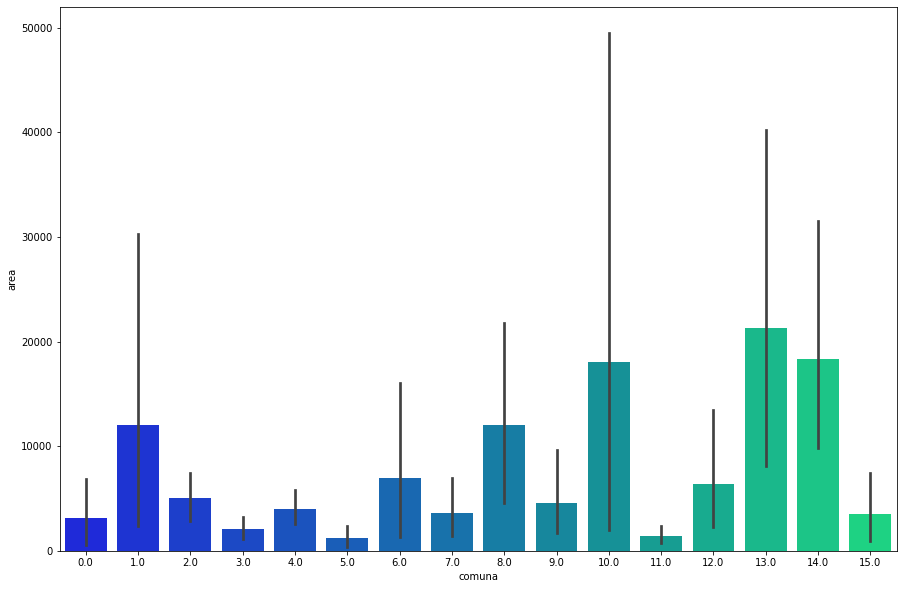

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'comuna', y = 'area', data = evt, palette="winter")

Se genera un grafico de barras para conocer cuantos M2 de espacios verde tiene hay segun su clasificacion

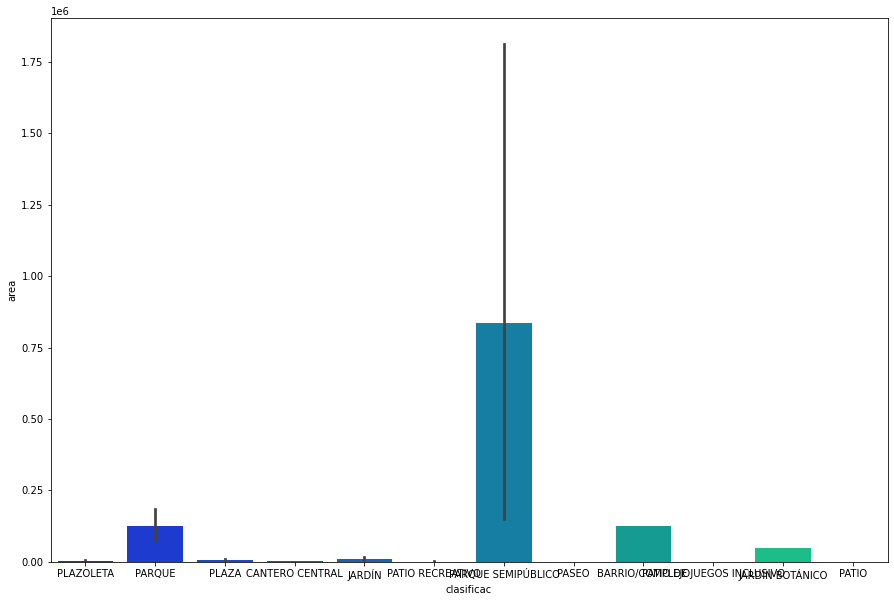

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'clasificac', y = 'area', data = evt, palette="winter")

Ahora hacemos lo mismo en formato de tabla, para conocer los numeros

In [ ]:
evt.groupby(["clasificac"]).area.sum()


clasificac
BARRIO/COMPLEJO               124739.144
CANTERO CENTRAL              1112466.599
JARDÍN                        294967.606
JARDÍN BOTÁNICO                49868.072
PARQUE                       7015027.959
PARQUE SEMIPÚBLICO           3337706.205
PASEO                           1059.347
PATIO                           1515.590
PATIO DE JUEGOS INCLUSIVO       1312.427
PATIO RECREATIVO               14525.283
PLAZA                        2502148.914
PLAZOLETA                    1824483.321
Name: area, dtype: float64

Tambien se genera un grafico de torta para entender la relacion de M2 que existe entre los mismos

([<matplotlib.patches.Wedge at 0x7fd880309198>,
 [Text(1.0996813251131519, 0.026476087274799515, 'BARRIO/COMPLEJO'),
  Text(1.0622270412103185, 0.28578613143673126, 'CANTERO CENTRAL'),
  Text(0.9466206137096375, 0.5602761941221397, 'JARDÍN'),
  Text(0.907269671355933, 0.6219821086154308, 'JARDÍN BOTÁNICO'),
  Text(-0.4217799922440328, 1.0159240316788571, 'PARQUE'),
  Text(-0.7500142943325898, -0.8046605236351461, 'PARQUE SEMIPÚBLICO'),
  Text(-0.11634436626756388, -1.093829963219969, 'PASEO'),
  Text(-0.1158008304300679, -1.0938876394181016, 'PATIO'),
  Text(-0.11520383976242721, -1.0939506731585265, 'PATIO DE JUEGOS INCLUSIVO'),
  Text(-0.11185989073933589, -1.0942976582465047, 'PATIO RECREATIVO'),
  Text(0.4118785956783745, -1.0199784421359162, 'PLAZA'),
  Text(1.0325237895240291, -0.3793344488270723, 'PLAZOLETA')])

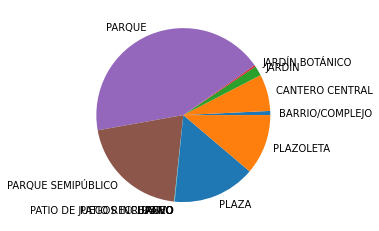

In [ ]:
fig, ax = plt.subplots()
ax.pie(evt.groupby(["clasificac"]).area.sum(),labels = evt.groupby(["clasificac"]).area.sum().index)

Tanto la tabla como el grafico de tortas se realizan a nivel comuna

In [ ]:
evt.groupby(["comuna"]).area.sum()

comuna
0.0       19003.432
1.0     3242112.835
2.0      336135.186
3.0       45904.233
4.0      614307.522
5.0       20884.801
6.0      215695.441
7.0      342438.339
8.0     4168891.548
9.0      717913.744
10.0    1247864.288
11.0     118195.611
12.0    1014328.639
13.0    1746754.667
14.0    2220344.164
15.0     209046.017
Name: area, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd88027d710>,
 [Text(1.099992603491233, 0.004033889510046634, '0.0'),
  Text(0.8868951309214684, 0.6507050228389141, '1.0'),
  Text(0.26927125888139125, 1.0665331636383517, '2.0'),
  Text(0.18998201386643754, 1.0834698124116116, '3.0'),
  Text(0.05077682665912863, 1.098827426793866, '4.0'),
  Text(-0.0839570090758265, 1.0967913295732428, '5.0'),
  Text(-0.13392503684421345, 1.091816873155144, '6.0'),
  Text(-0.25051663389303286, 1.071093560872674, '7.0'),
  Text(-0.9804931367187797, 0.4986313356051427, '8.0'),
  Text(-0.9794444979875423, -0.5006880020151585, '9.0'),
  Text(-0.7244021244554241, -0.8277931879910998, '10.0'),
  Text(-0.48367720441294304, -0.987955647755141, '11.0'),
  Text(-0.25797058537540213, -1.0693227656236786, '12.0'),
  Text(0.3209667958714257, -1.0521313206762883, '13.0'),
  Text(0.9604744525593181, -0.5361798448103757, '14.0'),
  Text(1.0991050810575609, -0.04436238038533153, '15.0')])

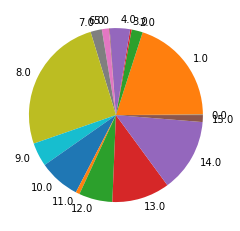

In [ ]:
fig, ax = plt.subplots()
ax.pie(evt.groupby(["comuna"]).area.sum(),labels = evt.groupby(["comuna"]).area.sum().index)

##Geopandas

###Se continuo realizando gráficos de mapas para entender la distribucion y clasificacion de los distintos espacios verdes en la ciudad de buenos aires

Grafico de espacios verdes en la ciudad segun su clasificacion

In [1]:
gplt.choropleth(ev, hue = ev['clasificac'], figsize = (20,16), legend = True)

NameError: ignored

Grafico de espacios verdes, con escala de colores segun su area

In [2]:
naranja = 'OrRd'
gplt.choropleth(ev, hue = ev['area'], cmap = naranja, figsize = (20,16))

NameError: ignored

Se probaron distintas formas para graficar lo mismo

In [ ]:
ev.plot(figsize = (20,16))

In [ ]:
ev.plot(column='clasificac', legend=True, figsize= (20,16))

Se puede notar que los parques, plazoletas y plazas son los predominantes en la ciudad

tambien se separo por espacios con mayor area total para poder visualizarlo mejor, la leyenda indica area total

In [ ]:
clasif = ev.dissolve(by='clasificac', aggfunc='sum')
clasif.plot(column = 'area', scheme='quantiles', legend=True, figsize = (20,16));

Luego se grafico solo un tipo de espacios verdes para entender la distribucion de cada uno

PLAZAS

In [ ]:
ax = ev[ev.clasificac == 'PLAZA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PLAZOLETAS

In [ ]:
ax = ev[ev.clasificac == 'PLAZOLETA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PARQUES

In [ ]:
ax = ev[ev.clasificac == 'PARQUE'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

Se puede notar una gran cantidad de plazas y plazoletas bastante distribuidas a lo largo de la ciudad, sin embargo parece los parques parecen no estar del todo distribuidos, dejando zonas lejos de alguno

###Se procedio a analizar las comunas

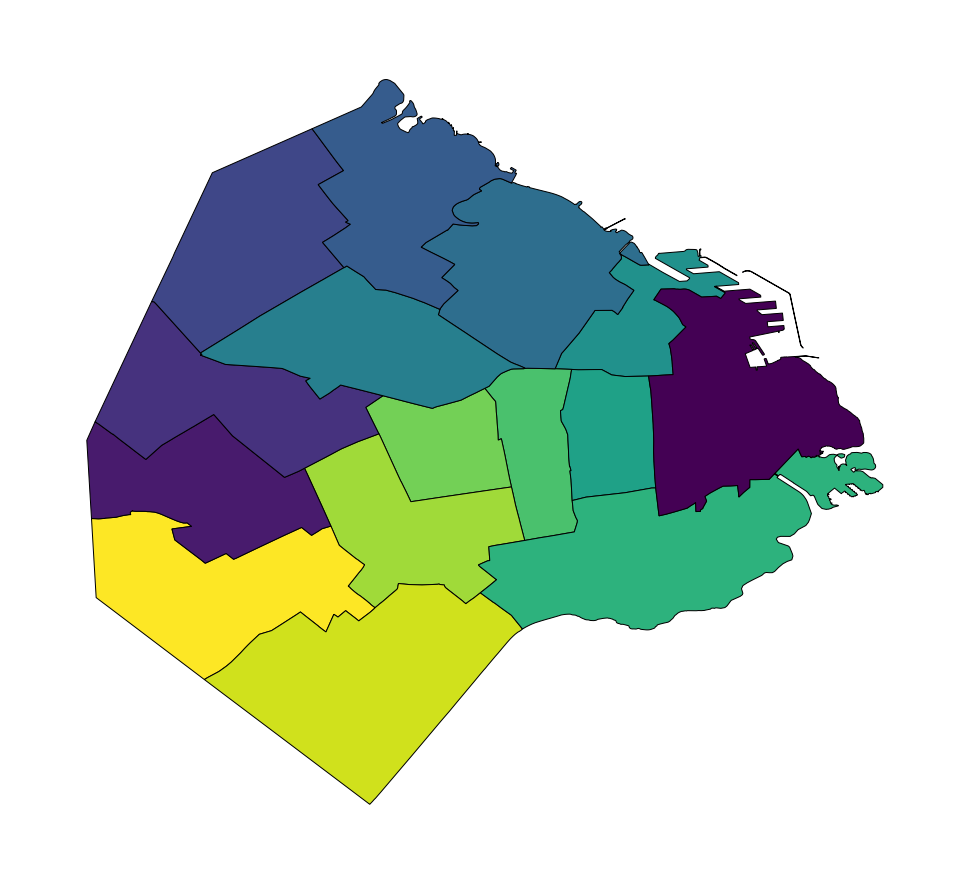

In [ ]:
gplt.choropleth(com, hue = com['comuna'], figsize = (20,16))

In [ ]:
evxcom = evt.groupby(["comuna"]).area.sum()


##Concatenar datasets

Se unio la coluna de area de espacios verdes al dataset de comuna, recordar:
- "area" equivale a area de espacios verdes
- "areac" equivale al area total de la comuna

In [ ]:
comev = pd.concat([evxcom, com], axis = 1)
comev.head(3)

,area,wkt,barrios,perimetro,areac,comuna,id,objeto,geometry
0.0,19003.432,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1.0,3242112.835,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2.0,336135.186,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


Grafico de comuna degradado segun cantidad de M2 de espacios verdes

TypeError: ignored

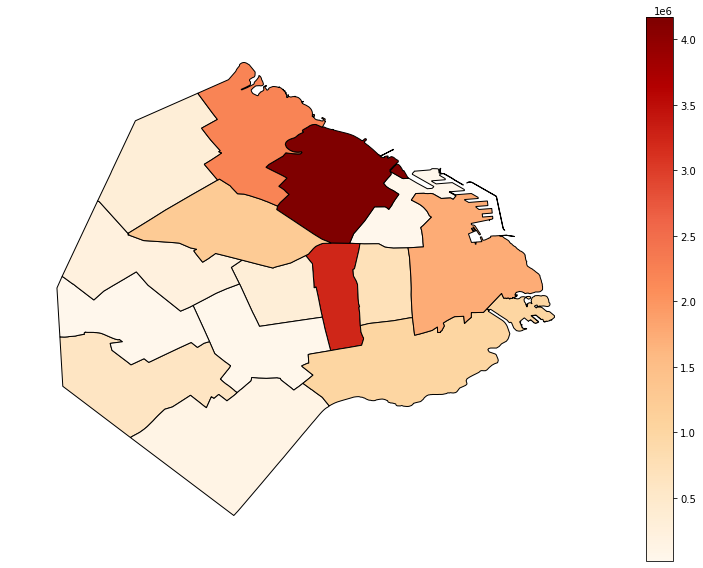

In [ ]:
gplt.choropleth(comev, hue = comev['area'], cmap = 'OrRd', figsize = (15,10), legend = True)

##Conclusion parcial

Creeamos que si bien los datasets no contiene muchas features cuantificables, con los datos de areas de espacios verdes y formas geometricas tanto de espacios como comunas se pueden analisis utiles y especificos. Ademas se tiene pensado unirlo con mas datasets de densidad poblacional en cada comuna de la ciudad y con el financiamiento que cada una recibe, para hacer un analisis aun mas global.

#Bibliografía

Se utilizaron distintas paguinas para contender el manejo de datasets de caracter geografico, sumado a las librerias basicas



https://towardsdatascience.com/plotting-geographical-data-with-geopandas-338cc7e17e4e

https://geopandas.org/aggregation_with_dissolve.html

https://geopandas.org/aggregation_with_dissolve.html
https://www.datacamp.com/community/tutorials/geospatial-data-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=Cj0KCQjwt4X8BRCPARIsABmcnOrWMSIaHzSoPH6EUAqAK2TPpsrLjKSR6wy41-uzoi5kBgnQXT49jBgaAuOgEALw_wcB

